# **IMPORTATIONS**

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [98]:
import pickle
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

# **PRE-PROCESSING**

On normalise les données et sépare les données d'entrainement et de tests : 

In [99]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **MODÈLE**

Créons le "classifier" : 

In [100]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
y_pred = classifier.predict(X_test)

**Regardons les résultats pour les données tests :**

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

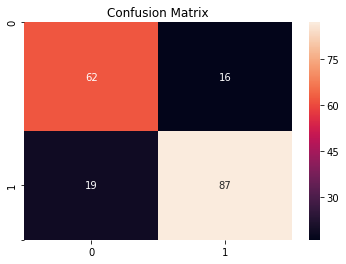

In [120]:
cm = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)

plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy :

In [121]:
accuracy_score(y_pred, y_test)

0.8097826086956522

* sensibilité :

In [122]:
tpr = recall_score(y_test, y_pred)
print("La sensibilité pour les données tests est : ")
print(tpr)

La sensibilité pour les données tests est : 
0.8446601941747572


* spécificité :

In [123]:
tn, fp, fn, tp = cm.ravel()

In [124]:
tnr_test = 1 - fp/(tn+fp)
print("La spécificité pour les données d'entrainement est : ")
print(tnr)

La spécificité pour les données d'entrainement est : 
0.770392749244713


* précision : 

In [125]:
print("La précision pour les données tests est : ")
print(precision_score(y_test, y_pred))

La précision pour les données tests est : 
0.8207547169811321


* F-Measure : 

In [126]:
print("F-Measure pour les données test : ")
print(f1_score(y_test, y_pred))

F-Measure pour les données test : 
0.832535885167464


**Regardons les résultats pour les données d'entrainement :**

In [127]:
y_pred_train = classifier.predict(X_train)

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

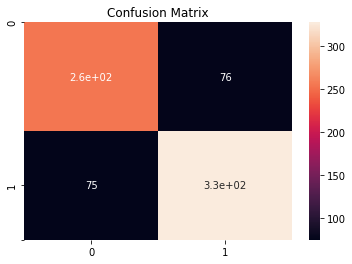

In [128]:
cm = confusion_matrix(y_pred_train, y_train)

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)

plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy : 

In [129]:
accuracy_score(y_pred_train, y_train)

0.7942779291553134

* sensibilité :

In [130]:
tpr = recall_score(y_train, y_pred_train)
print("La sensibilité pour les données d'entrainement est : ")
print(tpr)

La sensibilité pour les données d'entrainement est : 
0.8118811881188119


* spécificité :

In [131]:
tn, fp, fn, tp = cm.ravel()

In [132]:
tnr_train = 1 - fp/(tn+fp)
print("La spécificité pour les données d'entrainement est : ")
print(tnr)

La spécificité pour les données d'entrainement est : 
0.770392749244713


* précision :

In [133]:
print("La précision pour les données d'entrainement est : ")
print(precision_score(y_train, y_pred_train))

La précision pour les données d'entrainement est : 
0.8138957816377171


* F-Measure :

In [134]:
print("F-Measure pour les données d'entrainement : ")
print(f1_score(y_train, y_pred_train))

F-Measure pour les données d'entrainement : 
0.8128872366790584


**Regroupons les résultats dans un dataframe pandas :** 

In [135]:
d = {
     'Model': 'Naive Bayes',
     'Training Set Accuracy': accuracy_score(y_pred_train, y_train),
     'Test Set Accuracy': accuracy_score(y_pred, y_test),
     'Training Set TPR' : recall_score(y_train, y_pred_train),
     'Test Set TPR' : recall_score(y_test, y_pred),
     'Training Set PPV' : precision_score(y_train, y_pred_train),
     'Test Set PPV' : precision_score(y_test, y_pred),
     'Training Set F-Measure' : f1_score(y_train, y_pred_train),
     'Test Set F-Measure' : f1_score(y_test, y_pred),
     'Training Set TNR' : tnr_train,
     'Test Set TNR' : tnr_test
}

df_models_nb = pd.DataFrame(d, index=[0])
df_models_nb

,Model,Training Set Accuracy,Test Set Accuracy,Training Set TPR,Test Set TPR,Training Set PPV,Test Set PPV,Training Set F-Measure,Test Set F-Measure,Training Set TNR,Test Set TNR
0,Naive Bayes,0.794278,0.809783,0.811881,0.84466,0.813896,0.820755,0.812887,0.832536,0.770393,0.794872


In [136]:
with open('df_models_nb.pickle', 'wb') as output:
    pickle.dump(df_models_nb, output)